In [105]:
#======== importing libraries ================
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

#======== importing and cleaning data ================
dataset = pd.read_csv("Churn_Modelling.csv")
x = dataset.iloc[:,3:13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [106]:
from sklearn.preprocessing import LabelEncoder
#======== converting country(0,1,2,3) and gender (0,1) into numerical values ===================
labelencoder = LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
x[:,1] = labelencoder.fit_transform(x[:,1])
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [107]:
#======== converting the above array into dataframe ===================
x = pd.DataFrame(x, columns = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.0,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.8,3,1,0,113931.57
3,699,0,0,39,1,0.0,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.0,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.0,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [108]:
#======= scaling the data using mix max scaler ================
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_z = min_max_scaler.fit_transform(x)
df_z = pd.DataFrame(df_z, columns = ["CreditScore",  "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])
df_z

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429


In [109]:
#======== finding the sum of squared errors for different values of the number of clusters ===========
cluster_range = range(2,11)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init=5)
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,9496.549535
1,3,8383.274562
2,4,7017.463641
3,5,6393.185769
4,6,5909.620463
5,7,5287.481241
6,8,4938.261484
7,9,4827.320901
8,10,4488.079650


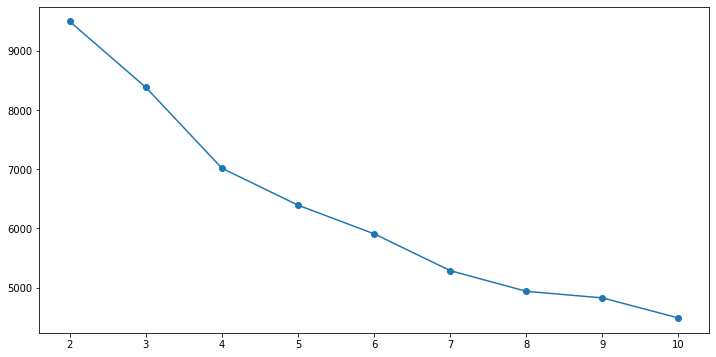

In [110]:
#========== plotting the number of clusters vs errors to find the optimal cluster numbers using Elbow Technique =================
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [111]:
#========= adding the CustomerId column because it has unique values and we will plot our scatter plot for this ===============
df_z = df_z.join(dataset["CustomerId"])
df_z

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,15634602
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,15647311
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,15619304
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,15701354
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,15737888
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,15606229
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,15569892
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,15584532
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,15682355


In [112]:
#=========== using KMeans function to make 6 clusters and fit predict the data =============
cluster = KMeans(n_clusters = 6, random_state = 1)
y_predicted = cluster.fit_predict(df_z)

df_z["cluster"] = pd.DataFrame(y_predicted, columns = ["cluster"])
df_z

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,15634602,1
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,15647311,1
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,15619304,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,15701354,2
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,15737888,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,15606229,3
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,15569892,3
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,15584532,3
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,15682355,5


In [113]:
#============= sepeating each cluster ====================
x0 = df_z[df_z.cluster == 0]
x1 = df_z[df_z.cluster == 1]
x2 = df_z[df_z.cluster == 2]
x3 = df_z[df_z.cluster == 3]
x4 = df_z[df_z.cluster == 4]
x5 = df_z[df_z.cluster == 5]

In [114]:
x0

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,15737888,0
10,0.356,0.0,1.0,0.175676,0.6,0.406606,0.333333,0.0,0.0,0.400886,15767821,0
11,0.294,1.0,1.0,0.081081,0.3,0.000000,0.333333,1.0,0.0,0.381929,15737173,0
16,0.606,0.5,1.0,0.540541,0.1,0.528513,0.000000,1.0,0.0,0.025433,15737452,0
25,0.454,0.0,1.0,0.094595,0.3,0.000000,0.333333,0.0,1.0,0.622543,15738191,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9951,0.570,1.0,1.0,0.378378,0.8,0.000000,0.333333,1.0,1.0,0.303667,15763874,0
9954,0.590,0.0,1.0,0.364865,0.6,0.619445,0.000000,0.0,1.0,0.017190,15739850,0
9972,0.816,0.0,1.0,0.108108,0.4,0.620729,0.000000,1.0,0.0,0.857784,15747927,0
9982,0.610,0.5,0.0,0.378378,0.7,0.546617,0.000000,1.0,0.0,0.575729,15768163,0


In [115]:
x1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,15634602,1
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,15647311,1
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,15619304,1
12,0.252,0.0,0.0,0.216216,1.0,0.000000,0.333333,1.0,0.0,0.131260,15632264,1
15,0.532,0.5,1.0,0.364865,0.3,0.570468,0.333333,0.0,1.0,0.321609,15643966,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9946,0.638,0.0,0.0,0.202703,0.9,0.000000,0.333333,0.0,1.0,0.536098,15618171,1
9950,0.550,0.5,0.0,0.283784,1.0,0.517522,0.000000,1.0,1.0,0.482213,15638494,1
9955,0.728,1.0,1.0,0.148649,0.4,0.000000,0.333333,1.0,1.0,0.187990,15611338,1
9964,0.258,0.0,1.0,0.216216,0.5,0.468690,0.333333,0.0,0.0,0.566538,15642785,1


In [116]:
x2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,15701354,2
22,0.320,1.0,0.0,0.270270,0.4,0.000000,0.000000,1.0,0.0,0.594567,15699309,2
23,0.638,0.0,1.0,0.378378,0.3,0.000000,0.333333,0.0,1.0,0.042385,15725737,2
27,0.442,0.0,1.0,0.351351,0.9,0.000000,0.333333,0.0,0.0,0.192127,15700772,2
28,0.448,0.5,0.0,0.337838,0.3,0.563374,0.000000,1.0,1.0,0.500927,15728693,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0.848,0.0,1.0,0.297297,0.9,0.370738,0.333333,1.0,0.0,0.958078,15703563,2
9979,0.654,0.0,0.0,0.540541,0.1,0.358802,0.000000,0.0,1.0,0.014885,15692664,2
9980,0.782,1.0,1.0,0.229730,0.6,0.296421,0.000000,0.0,0.0,0.497968,15719276,2
9984,0.504,0.5,1.0,0.229730,0.7,0.361112,0.333333,1.0,1.0,0.258444,15696175,2


In [117]:
x3

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
5,0.590,1.0,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,15574012,3
6,0.944,0.0,1.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,15592531,3
9,0.668,0.0,1.0,0.121622,0.2,0.536488,0.000000,1.0,1.0,0.358605,15592389,3
14,0.570,1.0,0.0,0.229730,0.7,0.000000,0.333333,1.0,1.0,0.329732,15600882,3
19,0.752,0.0,0.0,0.081081,0.6,0.000000,0.333333,1.0,1.0,0.273588,15568982,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.982,1.0,1.0,0.135135,0.4,0.000000,0.333333,1.0,1.0,0.897211,15605622,3
9993,0.588,0.0,1.0,0.135135,0.7,0.618021,0.000000,1.0,0.0,0.145854,15569266,3
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,15606229,3
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,15569892,3


In [118]:
x4

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
8,0.302,0.0,1.0,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,15792365,4
17,0.398,1.0,0.0,0.081081,0.9,0.000000,0.333333,1.0,1.0,0.071981,15788218,4
35,0.250,0.0,0.0,0.364865,0.0,0.535134,0.000000,1.0,0.0,0.139070,15794171,4
36,0.280,1.0,1.0,0.175676,0.3,0.578961,0.000000,0.0,1.0,0.570330,15788448,4
59,0.528,0.0,1.0,0.445946,0.4,0.162161,0.000000,1.0,1.0,0.233841,15804771,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9949,1.000,0.0,0.0,0.391892,0.9,0.547242,0.000000,1.0,0.0,0.221722,15798615,4
9963,0.780,0.5,1.0,0.202703,0.2,0.504285,0.000000,1.0,0.0,0.684354,15814664,4
9969,0.518,0.0,1.0,0.310811,0.6,0.000000,0.000000,0.0,1.0,0.562922,15806360,4
9973,0.522,0.0,1.0,0.121622,0.7,0.000000,0.333333,1.0,1.0,0.787388,15806455,4


In [119]:
x5

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,cluster
7,0.052,0.5,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,15656148,5
13,0.398,0.0,0.0,0.094595,0.5,0.000000,0.333333,0.0,0.0,0.954322,15691483,5
18,0.474,1.0,1.0,0.364865,0.6,0.000000,0.000000,0.0,0.0,0.793442,15661507,5
29,0.122,0.0,1.0,0.148649,0.0,0.237934,0.333333,1.0,1.0,0.267384,15656300,5
33,0.340,1.0,0.0,0.324324,0.6,0.000000,0.333333,1.0,1.0,0.172011,15659428,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,0.574,0.0,0.0,0.202703,0.7,0.412031,0.000000,1.0,0.0,0.422081,15656062,5
9981,0.296,0.5,1.0,0.324324,0.3,0.605982,0.000000,1.0,1.0,0.267193,15672754,5
9983,0.526,0.0,1.0,0.297297,0.4,0.000000,0.000000,0.0,0.0,0.756641,15656710,5
9992,0.752,1.0,1.0,0.243243,0.2,0.000000,0.000000,1.0,0.0,0.975997,15657105,5


In [120]:
#============ grouping the data according to the cluster they are part of ====================
y = df_z.groupby("cluster").count()
y

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId
cluster,,,,,,,,,,,
0,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642
1,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693
2,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691
3,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679
4,1607,1607,1607,1607,1607,1607,1607,1607,1607,1607,1607
5,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688,1688


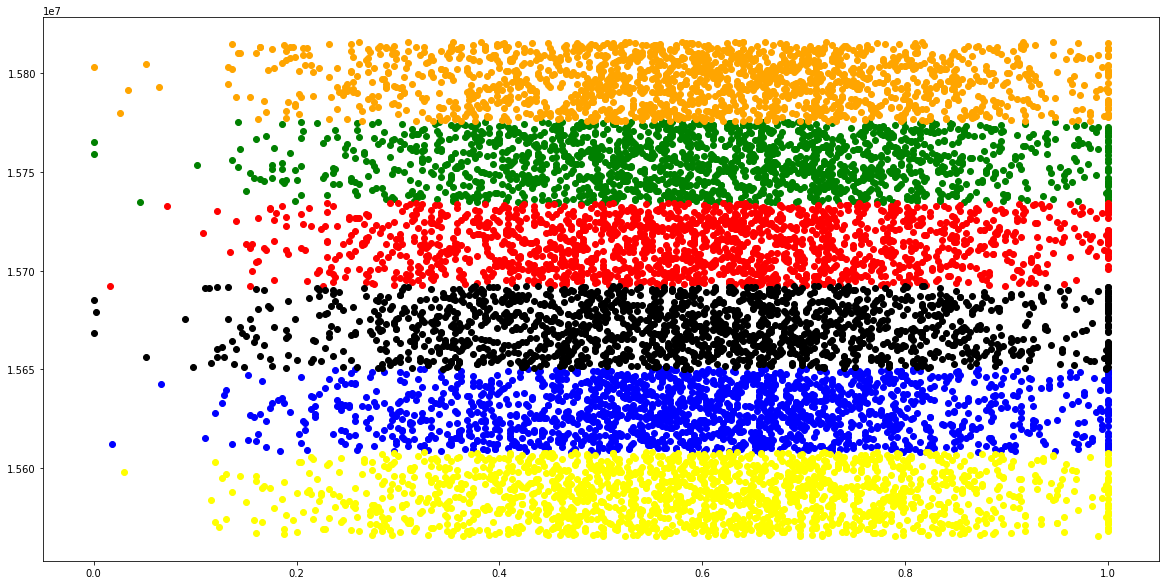

In [121]:
#======== plotting different clusters ===========================

plt.figure(figsize=(20,10))
plt.scatter(x0.CreditScore, x0.CustomerId, color = "green")
plt.scatter(x1.CreditScore, x1.CustomerId, color = "blue")
plt.scatter(x2.CreditScore, x2.CustomerId, color = "red")
plt.scatter(x3.CreditScore, x3.CustomerId, color = "yellow")
plt.scatter(x4.CreditScore, x4.CustomerId, color = "orange")
plt.scatter(x5.CreditScore, x5.CustomerId, color = "black")